# Image insights and processing using Histogram

Notebook focuses on using histograms to derive some useful insights about the image and then use them to make some enhacements to the image

In [1]:
# Importing libraries
import cv2
import sys
import imutils
sys.path.append('../')
from basics import functions as fn
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance 
import matplotlib.gridspec as gridspec
np.set_printoptions(threshold=sys.maxsize, linewidth = 120)

In [2]:
# Reading a sample image
fog = cv2.imread("C://Users//ankushukla//Documents//Work//CV Training//Images//fog.jpg")
fog = cv2.cvtColor(fog, cv2.COLOR_BGR2RGB)

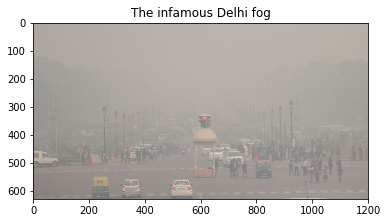

In [3]:
plt.imshow(fog, cmap='gray', vmin=0, vmax=255)
plt.title('The infamous Delhi fog')
plt.show()

In [4]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (40,20))
f.suptitle('Histograms of the fog image (a) Red (b) Green (c) Blue', fontsize=64)
ax1.plot(cv2.calcHist([fog[:,:,0]],[0],None,[256],[0,256]), color = 'red')
ax2.plot(cv2.calcHist([fog[:,:,1]],[0],None,[256],[0,256]), color = 'green')
ax3.plot(cv2.calcHist([fog[:,:,2]],[0],None,[256],[0,256]), color = 'blue')
plt.show()

In [5]:
fog_st = fn.stretch(fog)
plt.imshow(fog_st)

In [6]:
np.max(fog_st)

255

In [7]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (30,10))
f.suptitle('Histograms of the fog image (a) Red (b) Green (c) Blue', fontsize=64)
ax1.plot(cv2.calcHist([fog_st[:,:,0]],[0],None,[256],[0,256]), color = 'red')
ax2.plot(cv2.calcHist([fog_st[:,:,1]],[0],None,[256],[0,256]), color = 'green')
ax3.plot(cv2.calcHist([fog_st[:,:,2]],[0],None,[256],[0,256]), color = 'blue')
plt.show()

In [8]:
# generating classification matrix
binary0 = fog_st[:,:,0]
binary1 = fog_st[:,:,1]
binary2 = fog_st[:,:,2]

# classifying based on histogram
binary0[binary0>80] = 255
binary0[binary0<=80] = 0
binary1[binary1>80] = 255
binary1[binary1<=80] = 0
binary2[binary2>80] = 255
binary2[binary2<=80] = 0

In [9]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (30,10))
f.suptitle('Segregated channels (a) Red (b) Green (c) Blue', fontsize=40)
ax1.imshow(binary0, cmap='Reds', vmin=0, vmax=255)
ax2.imshow(binary1, cmap='Greens', vmin=0, vmax=255)
ax3.imshow(binary2, cmap='Blues', vmin=0, vmax=255)
plt.show()

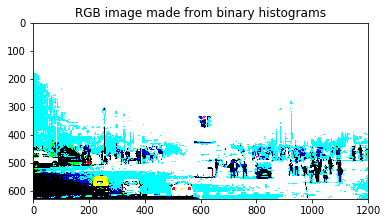

In [10]:
res = fog
res[:,:,0] = binary0
res[:,:,1] = binary1
res[:,:,2] = binary2
plt.imshow(res)
plt.title('RGB image made from binary histograms')
plt.show()

In [11]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (30,10))
f.suptitle('Histograms of the binary fog image (a) Red (b) Green (c) Blue', fontsize=64)
ax1.plot(cv2.calcHist([res[:,:,0]],[0],None,[256],[0,256]), color = 'red')
ax2.plot(cv2.calcHist([res[:,:,1]],[0],None,[256],[0,256]), color = 'green')
ax3.plot(cv2.calcHist([res[:,:,2]],[0],None,[256],[0,256]), color = 'blue')
plt.show()

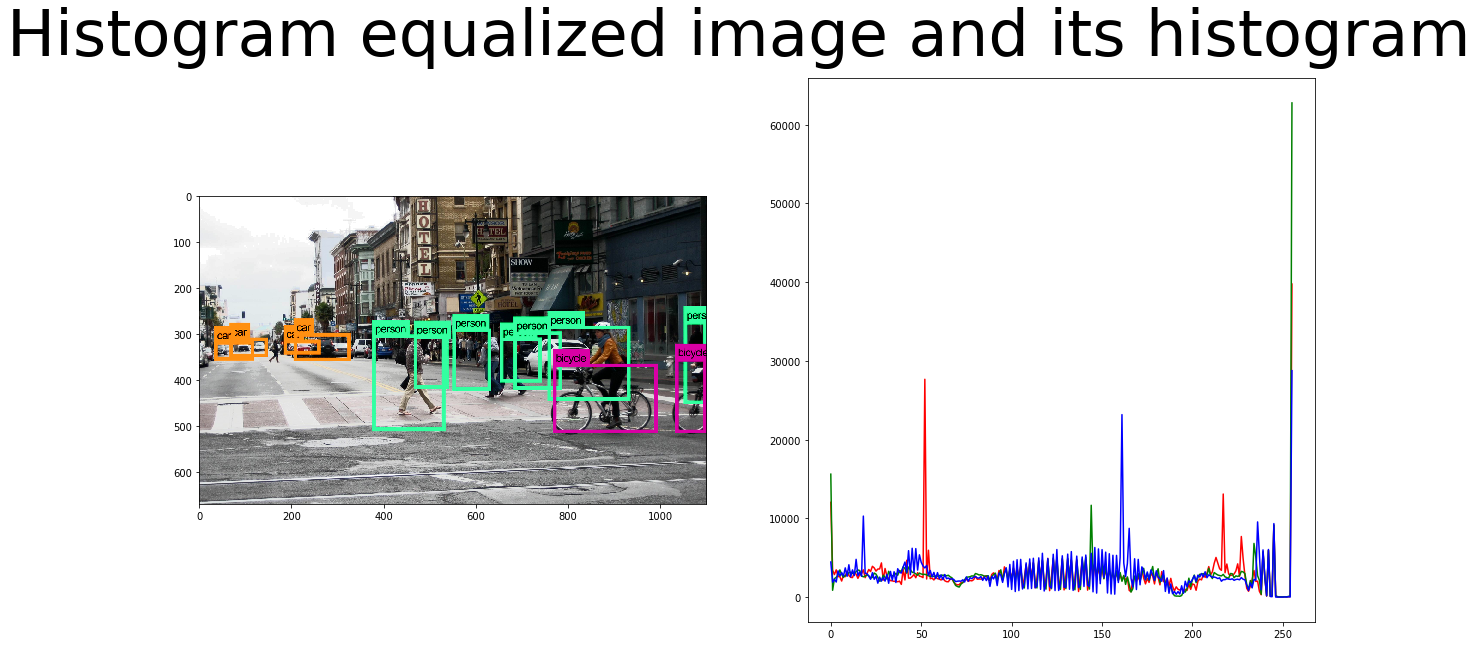

In [12]:
# histogram equalization
res = fog
img_yuv = cv2.cvtColor(cv2.imread('C://Users//ankushukla//Documents//Work//CV Training//Images//object_detection.png'), cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
res[:,:,0] = cv2.equalizeHist(fog[:,:,0])
res[:,:,1] = cv2.equalizeHist(fog[:,:,1])
res[:,:,2] = cv2.equalizeHist(fog[:,:,2])
# equ = cv2.equalizeHist(fog[:,:,0])
f, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))
f.suptitle('Histogram equalized image and its histogram', fontsize=64)
ax1.imshow(img_output)
ax2.plot(cv2.calcHist([img_output[:,:,0]],[0],None,[256],[0,256]), color = 'red')
ax2.plot(cv2.calcHist([img_output[:,:,1]],[0],None,[256],[0,256]), color = 'green')
ax2.plot(cv2.calcHist([img_output[:,:,2]],[0],None,[256],[0,256]), color = 'blue')
plt.show()